## Transmitter Block Diagram

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import reedsolo

## Block diagram Input data (ASCII->BINARY)

In [3]:
def string_to_bits(s):
    """Convert a string to a list of bits."""
    return list(itertools.chain.from_iterable([list(map(int, f"{ord(c):08b}")) for c in s]))

def binary_to_bytes(binary_str):
    """Convert a binary string to bytes."""
    byte_array = bytearray()
    for i in range(0, len(binary_str), 8):
        byte_array.append(int(binary_str[i:i+8], 2))
    return bytes(byte_array)

def bytes_to_binary(byte_array):
    """Convert bytes to a binary string."""
    return ''.join(f'{byte:08b}' for byte in byte_array)


## Block Diagram QAM

In [4]:
#Blok diagram QAM

def binary_to_qam16(bits):
    """Convert a binary list to QAM-16 symbols."""
    # M = 4  # QAM-4
    M = 16 # QAM-16
    bits_per_symbol = int(np.log2(M))  # 4 bits per QAM-16 symbol
    
    # Ensure the stream length is a multiple of bits_per_symbol (4 for QAM-16)
    pad_length = (bits_per_symbol - len(bits) % bits_per_symbol) % bits_per_symbol
    padded_bits = np.append(bits, [0] * pad_length)

    # QAM-16 mapping
    mapping = {
        '0000': -3-3j, '0001': -3-1j, '0010': -3+3j, '0011': -3+1j,
        '0100': -1-3j, '0101': -1-1j, '0110': -1+3j, '0111': -1+1j,
        '1000':  3-3j, '1001':  3-1j, '1010':  3+3j, '1011':  3+1j,
        '1100':  1-3j, '1101':  1-1j, '1110':  1+3j, '1111':  1+1j
    }
    

    # QAM-4 mapping
    # mapping = {
    #     '00':  1+1j,  # Symbol 1
    #     '01':  1-1j,  # Symbol 2
    #     '11': -1-1j,  # Symbol 3
    #     '10': -1+1j   # Symbol 4
    # }

    symbols = []
    # Convert each group of 4 bits to a QAM-16 symbol
    for i in range(0, len(padded_bits), bits_per_symbol):
        bit_group = ''.join(str(int(bit)) for bit in padded_bits[i:i+bits_per_symbol])
        symbols.append(mapping[bit_group])

    return np.array(symbols)
    

# Blok Diagram Hermitian Mapping

In [5]:
#Blok Diagram Hermitian

def hermitian_symmetry(symbols):
    """Apply Hermitian symmetry to generate a 16-subcarrier OFDM symbol."""
    N = 16  # Number of subcarriers
    hermitian_symmetric = np.zeros(N, dtype=complex)  # Initialize the output array
    
    # Assign QAM symbols to the subcarriers according to the specified order
    hermitian_symmetric[1:8] = symbols[0:7]  # Subcarrier 2 to 8
    hermitian_symmetric[8] = 0  # Nyquist frequency (Subcarrier 9) is set to 0
    hermitian_symmetric[9] = np.conj(symbols[6])  # Subcarrier 10 is the conjugate of Subcarrier 8
    hermitian_symmetric[10:15] = np.conj(symbols[1:6])[::-1]  # Subcarrier 11 to 15 are conjugate and reversed
    hermitian_symmetric[15] = np.conj(symbols[0])  # Subcarrier 16 is the conjugate of Subcarrier 2

    return hermitian_symmetric


# Block Diagram IDFT

In [6]:
# Blok diagaram IDFT

def create_ofdm_symbols(qam_symbols, num_subcarriers=16, symbols_per_ofdm=7):
    """Create OFDM symbols with Hermitian symmetry."""
    num_ofdm_symbols = len(qam_symbols) // symbols_per_ofdm  # Number of OFDM symbols
    ofdm_symbols = []  # List to hold the time-domain OFDM symbols
    
    for i in range(num_ofdm_symbols):
        # Extract the relevant QAM symbols for this OFDM symbol
        start_idx = i * symbols_per_ofdm
        end_idx = start_idx + symbols_per_ofdm
        qam_chunk = qam_symbols[start_idx:end_idx]
        
        # Apply Hermitian symmetry to create the frequency-domain sequence
        hermitian_symmetric_seq = hermitian_symmetry(qam_chunk)
        # Print the time-domain OFDM symbols
        # print("hermitian_symmetric_seq Symbols:")
        # print(hermitian_symmetric_seq)
        
        # Perform IFFT to get the time-domain OFDM symbol
        time_domain_ofdm = np.fft.ifft(hermitian_symmetric_seq)
        
        # Append the time-domain OFDM symbol to the list
        ofdm_symbols.append(time_domain_ofdm)
        
    
    return np.array(ofdm_symbols)  # Convert list to a NumPy array

#Blok tambahan untuk 

# Data INPUT

In [17]:
# Blok diagaram Input data dan 

# data = "Orthogonal Frequency Division Multiplexing (OFDM)"
data = "Hello World"
#data = "Simulation Division Multiplexing Programming Code"
character_count = len(data)
print (f"len of data: {character_count}")

bits = string_to_bits(data)
print("tx bits: ", bits)

binary_str = ''.join(map(str, bits))
print(f"Transmitted Signal: {list(binary_str)}")

data_bytes = binary_to_bytes(binary_str)

len of data: 11
tx bits:  [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
Transmitted Signal: ['0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0']


# Block diagram Reed-Solomon code

In [16]:
# Initialize the Reed-Solomon code
# Encoding the data BY rs(15,11) 2 BIT error corrections
n = 15
k = 11
rs = reedsolo.RSCodec(n - k)

encoded_data = rs.encode(data_bytes)
# Convert the encoded bytes back to binary
encoded_binary = bytes_to_binary(encoded_data)
print(f"FEC Encoded binary data: {encoded_binary}")

# Convert the binary string to a list of integers
binary_list = [int(bit) for bit in encoded_binary]
print(binary_list)


FEC Encoded binary data: 010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011001001010010000100001111100010
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]


# QAM + Hermitian + OFDM 

In [15]:
# Step 4: QAM Modulation for each parallel stream
qam_symbols = binary_to_qam16(binary_list)
# print(f"QAM Symbols (one row per subcarrier):{qam_symbols}")

# Create OFDM symbols
ofdm_symbols = create_ofdm_symbols(qam_symbols)
# Print the time-domain OFDM symbols
print("Time-Domain OFDM Symbols:")
print(ofdm_symbols)

tx_signal_combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
print("combine real of ofdm", tx_signal_combined_real)

Time-Domain OFDM Symbols:
[[-0.125     +0.j  0.13919713+0.j  0.65533009+0.j  0.51556596+0.j
   0.125     +0.j -0.29509421+0.j  0.65533009+0.j -1.17146304+0.j
   0.875     +0.j  1.52501643+0.j -0.40533009+0.j -0.05845918+0.j
  -1.375     +0.j -0.86911936+0.j -0.40533009+0.j  0.21435626+0.j]
 [-0.875     +0.j  0.19717565+0.j  0.0517767 +0.j -0.03274658+0.j
   0.875     +0.j  0.30334463+0.j  0.6982233 +0.j  0.45610584+0.j
  -0.375     +0.j -1.30072904+0.j -0.3017767 +0.j  0.42919319+0.j
  -1.125     +0.j -0.69979124+0.j  1.0517767 +0.j  0.64744755+0.j]
 [-0.625     +0.j -0.94717565+0.j  0.0517767 +0.j  0.05020876+0.j
  -0.875     +0.j -1.05334463+0.j  1.0517767 +0.j -0.55072904+0.j
   0.375     +0.j  0.55072904+0.j -0.3017767 +0.j  1.05334463+0.j
  -0.375     +0.j -0.05020876+0.j  0.6982233 +0.j  0.94717565+0.j]
 [ 0.125     +0.j  1.87068729+0.j -0.58210678+0.j  0.11385242+0.j
   0.625     +0.j -0.38814947+0.j  1.18566017+0.j -0.40191265+0.j
  -0.375     +0.j  0.29352627+0.j  0.83210678+0

# Plotting Figure

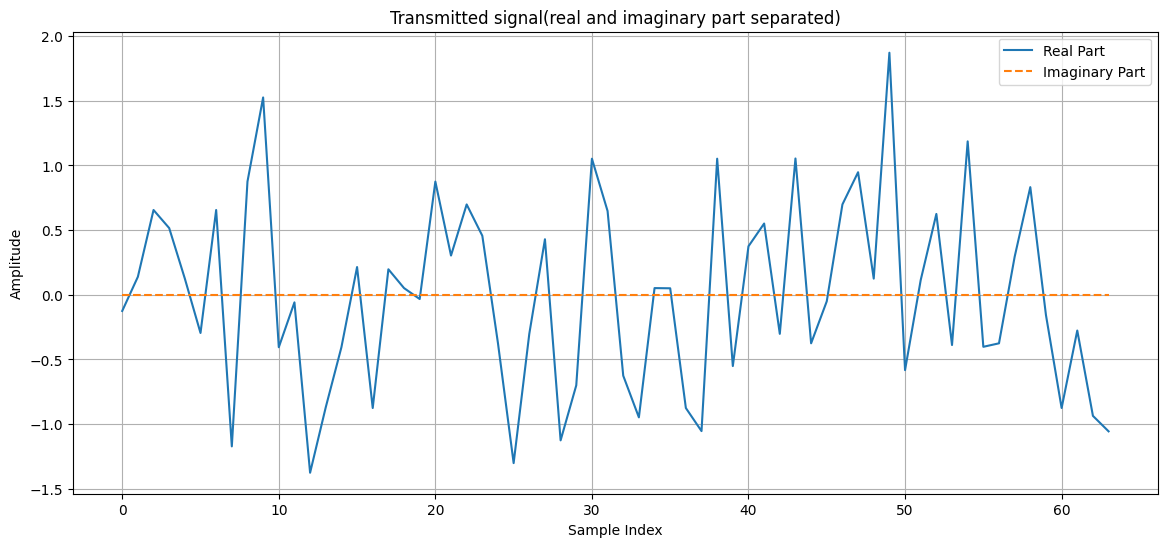

In [10]:
def plot_ofdm_symbols(ofdm_symbols):
    """Plot the real and imaginary parts of all time-domain OFDM symbols in a single graph."""
    combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
    combined_imag = np.concatenate([ofdm.imag for ofdm in ofdm_symbols])

    plt.figure(figsize=(14, 6))

    plt.plot(combined_real, label='Real Part')
    plt.plot(combined_imag, label='Imaginary Part', linestyle='--')
    plt.title('Transmitted signal(real and imaginary part separated)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Visualize the time-domain OFDM symbols
plot_ofdm_symbols(ofdm_symbols)

# Signal Clipping

transmitted signal clipped [[19.36606961 24.65001224 34.97267132 32.1773889  24.36606961 15.96418547
  34.97267132  0.         37.30325394 37.30325394 13.75946789 20.69688593
   0.          4.4836825  13.75946789 26.15319478  4.36606961 25.80958251
  22.90160351 21.21113804 37.30325394 27.93296218 35.8305357  30.98818635
  14.36606961  0.         15.8305357  30.44993336  0.          7.87024485
  37.30325394 34.81502067  9.36606961  2.9225567  22.90160351 22.87024485
   4.36606961  0.79917704 37.30325394 10.85148889 29.36606961 32.88065032
  15.8305357  37.30325394 14.36606961 20.86189436 35.8305357  37.30325394
  24.36606961 37.30325394 10.22393398 24.14311792 34.36606961 14.10308016
  37.30325394 13.82781662 14.36606961 27.73659508 37.30325394 18.73115692
   4.36606961 16.3447878   3.15286617  0.76218697]]
Signal Transmitter [[219.36606961 224.65001224 234.97267132 232.1773889  224.36606961
  215.96418547 234.97267132 200.         237.30325394 237.30325394
  213.75946789 220.69688593 

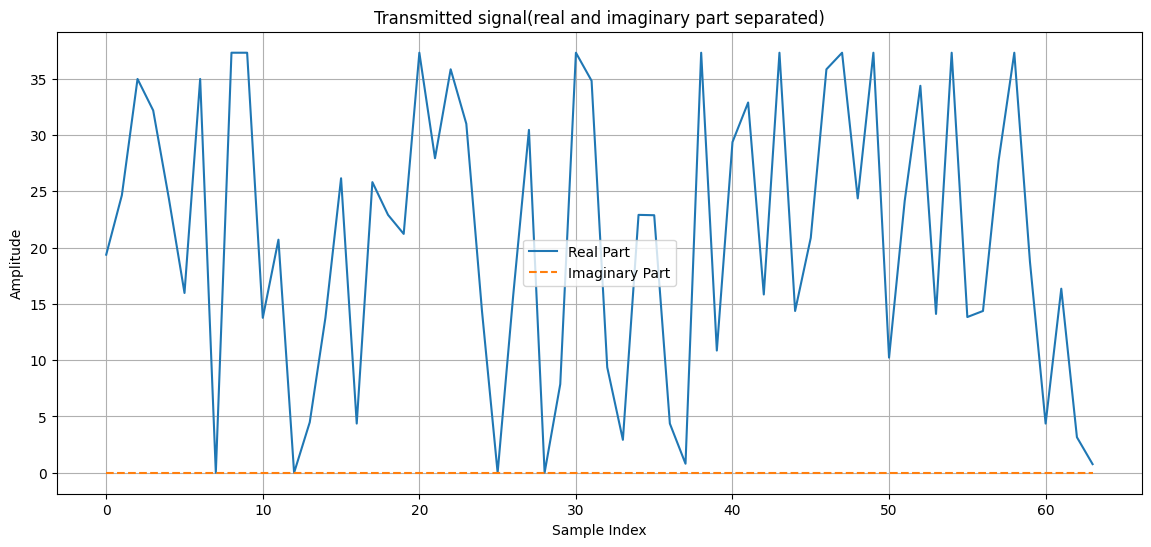

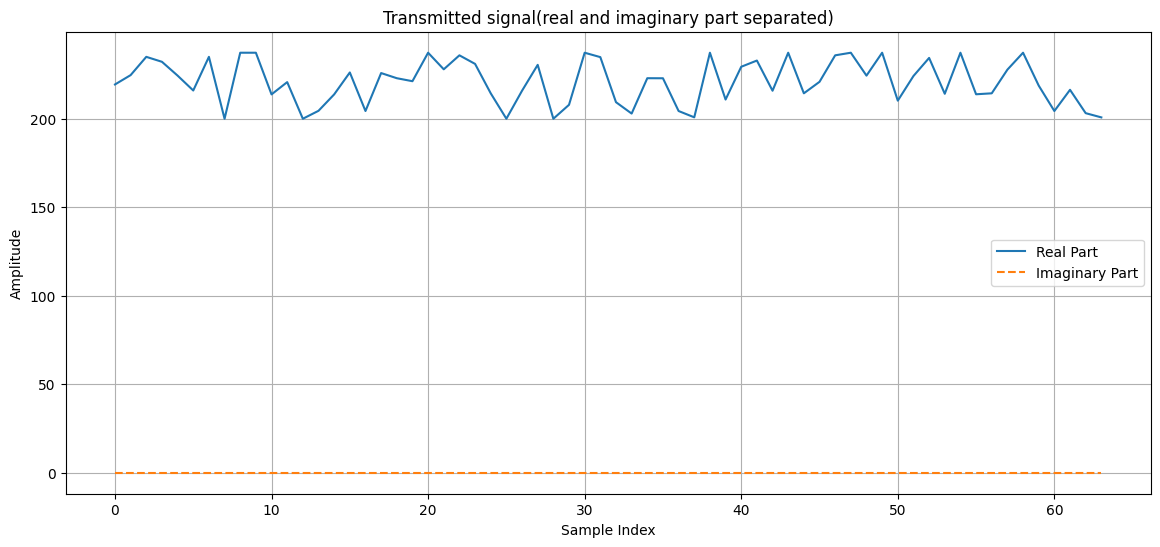

In [13]:
# Function to implement the clipping of the biased signal
def clip_signal(x_t):

    alpha = 1.5
    percentile_value = 85
    # Step 1: Calculate b = α ⋅ σ(x(t))
    sigma_x_t = np.std(x_t)
    b = alpha * sigma_x_t
    
    # Apply bias to the signal
    biased_signal = (x_t + b)*20 # scaling factor 5

    # Step 2: Calculate A = P_percentile(x_biased(t))
    A = np.percentile(biased_signal, percentile_value)

    # Step 3: Apply clipping
    clipped_signal = np.clip(biased_signal, 0, A)

    return clipped_signal

# Apply the clipping function
clipped_signal_example = clip_signal(tx_signal_combined_real)
clipped_signal_example = np.array([clipped_signal_example])
transmitted_signal = clipped_signal_example + 200

print("transmitted signal clipped", clipped_signal_example)
print("Signal Transmitter", transmitted_signal)

plot_ofdm_symbols(clipped_signal_example)
plot_ofdm_symbols(transmitted_signal)

# Normalisasi Value - Sending data to Transmitter

In [14]:
# Normalisasi Value

normalized_signal = np.round(transmitted_signal).astype(int)
normalized_signal = normalized_signal.reshape(-1)
print(f"Normalized Signal: {normalized_signal}")
print(f"Normalized Signal Length: {len(normalized_signal)}")

# Converting list to the format with commas
formatted_list = ', '.join(map(str, normalized_signal))

# Printing the result
print(f"[{formatted_list}]")

Normalized Signal: [219 225 235 232 224 216 235 200 237 237 214 221 200 204 214 226 204 226
 223 221 237 228 236 231 214 200 216 230 200 208 237 235 209 203 223 223
 204 201 237 211 229 233 216 237 214 221 236 237 224 237 210 224 234 214
 237 214 214 228 237 219 204 216 203 201]
Normalized Signal Length: 64
[219, 225, 235, 232, 224, 216, 235, 200, 237, 237, 214, 221, 200, 204, 214, 226, 204, 226, 223, 221, 237, 228, 236, 231, 214, 200, 216, 230, 200, 208, 237, 235, 209, 203, 223, 223, 204, 201, 237, 211, 229, 233, 216, 237, 214, 221, 236, 237, 224, 237, 210, 224, 234, 214, 237, 214, 214, 228, 237, 219, 204, 216, 203, 201]
